In [1]:
#importing libraries 
import pandas as pd
import numpy as np
import json
import pickle
import random

# import sklearn libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import GridSearchCV,StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBClassifier
from sklearn.svm import SVC
from  sklearn.model_selection import train_test_split


# import torch deep learning libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import SGD


# for reproducability ML
np.random.seed(1)
RandomState=1

# for reproducability of DL
manualSeed = 1
random.seed(manualSeed)
torch.manual_seed(manualSeed)
random.seed(manualSeed)


import warnings
warnings.filterwarnings('ignore')

In [2]:
poll = pd.read_csv('data/electionpoll.csv')

In [9]:
poll.head()

,Date \ Party,National Party,People's Party,Alliance Party,Civic Party,Conservative Party,Liberal Party,Workers' Party
0,2019-01-01,0,20,27,26,1,3,23
1,2019-01-02,0,19,28,26,1,4,22
2,2019-01-03,0,20,29,27,0,3,21
3,2019-01-04,0,22,25,25,1,2,25
4,2019-01-05,0,24,22,21,4,1,28


In [15]:
poll.describe()

,National Party,People's Party,Alliance Party,Civic Party,Conservative Party,Liberal Party,Workers' Party
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,1.789041,8.145205,19.638356,27.391781,2.263014,12.087671,28.684932
std,4.499315,8.240763,6.351054,3.901597,1.648135,8.768261,3.790085
min,0.000000,0.000000,2.000000,18.000000,0.000000,0.000000,14.000000
25%,0.000000,1.000000,17.000000,24.000000,1.000000,3.000000,26.000000
50%,0.000000,3.000000,21.000000,27.000000,2.000000,15.000000,29.000000
75%,0.000000,16.000000,24.000000,30.000000,3.000000,20.000000,32.000000
max,18.000000,24.000000,36.000000,37.000000,6.000000,29.000000,36.000000


In [26]:
# poll.describe(include='number').T
# poll.describe(include='O').T

In [16]:
# check for null values
poll.isnull().sum()

Date \ Party          0
National Party        0
People's Party        0
Alliance Party        0
Civic Party           0
Conservative Party    0
Liberal Party         0
Workers' Party        0
dtype: int64

In [11]:
# dataframe from 1st march 2019 to 31st march 2019
poll_1 = poll[poll['Date \ Party'].str.contains('2019-03')]

In [13]:
# the difference between larrgest and smallest value for Workers' Party
poll_1['Workers\' Party'].max() - poll_1['Workers\' Party'].min()

9

In [14]:
poll.max()

Date \ Party          2019-12-31
National Party                18
People's Party                24
Alliance Party                36
Civic Party                   37
Conservative Party             6
Liberal Party                 29
Workers' Party                36
dtype: object

In [17]:
# convert time to datetime
poll['Date \ Party'] = pd.to_datetime(poll['Date \ Party'])

In [18]:
poll.head()

,Date \ Party,National Party,People's Party,Alliance Party,Civic Party,Conservative Party,Liberal Party,Workers' Party
0,2019-01-01,0,20,27,26,1,3,23
1,2019-01-02,0,19,28,26,1,4,22
2,2019-01-03,0,20,29,27,0,3,21
3,2019-01-04,0,22,25,25,1,2,25
4,2019-01-05,0,24,22,21,4,1,28


In [20]:
# what is the average value count for each month
poll.groupby(poll['Date \ Party'].dt.month).mean()

,National Party,People's Party,Alliance Party,Civic Party,Conservative Party,Liberal Party,Workers' Party
Date \ Party,,,,,,,
1,0.129032,19.451613,26.032258,26.677419,1.935484,1.806452,23.967742
2,0.035714,19.785714,22.250000,26.500000,2.392857,1.285714,27.750000
3,0.129032,18.580645,21.387097,27.225806,2.096774,1.935484,28.645161
4,0.000000,16.433333,18.700000,29.800000,1.366667,2.400000,31.300000
5,0.193548,12.838710,17.677419,30.774194,2.000000,4.193548,32.322581
6,0.166667,2.666667,20.966667,27.200000,2.866667,17.100000,29.033333
7,0.064516,1.258065,20.322581,27.709677,2.645161,18.096774,29.903226
8,0.193548,1.806452,19.967742,26.161290,1.870968,19.419355,30.580645
9,0.166667,1.366667,22.933333,25.633333,2.433333,20.400000,27.066667


<AxesSubplot:xlabel='Date \\ Party'>

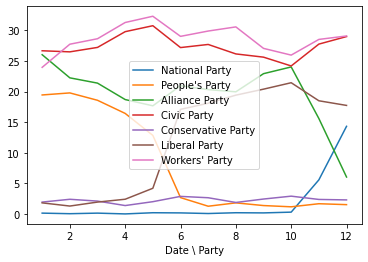

In [21]:
# plot moving average for each party for each month
poll.groupby(poll['Date \ Party'].dt.month).mean().plot()

# JOIN

In [28]:
data = pd.read_csv('data/arvind_data/shooting.csv', encoding='latin1')
data.head() 

,Player,Nation,Pos,Age,90s,Gls,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,FK,PK,PKatt
0,Virgil van Dijk,nl NED,DF,28,38.0,5,30,14,46.7,0.79,0.37,0.17,0.36,0,0,0
1,Trent Alexander-Arnold,eng ENG,DF,20,35.3,4,44,13,29.5,1.25,0.37,0.09,0.31,12,0,0
2,Georginio Wijnaldum,nl NED,MF,28,32.6,4,36,15,41.7,1.10,0.46,0.11,0.27,0,0,0
3,Andrew Robertson,sco SCO,DF,25,34.6,2,20,6,30.0,0.58,0.17,0.10,0.33,0,0,0
4,Roberto Firmino,br BRA,FW,27,33.2,9,100,37,37.0,3.01,1.11,0.09,0.24,0,0,0


In [50]:
y = data['Gls']
X = data.drop(['Gls','Player','Nation'], axis=1)

In [51]:
# X['Nation'].unique()

In [52]:
# map postion and nationality to numerical values
X['Pos'] = X['Pos'].map({'FW':0, 'MF':1, 'DF':2, 'GK':3})
# # array(['nl NED', 'eng ENG', 'sco SCO', 'br BRA', 'eg EGY', 'sn SEN',
#        'es ESP', 'gn GUI', 'hr CRO', 'cm CMR', 'be BEL', 'wal WAL',
#        'jp JPN', 'ch SUI'], dtype=object)
# X['Nation'] = X['Nation'].map
# fill missing values with interpolation
X = X.interpolate()

In [54]:
# find the feature importance of each feature using random forest
model = RandomForestClassifier()
model.fit(X,y)
model.feature_importances_

array([0.04365948, 0.04177034, 0.08317352, 0.19091592, 0.15732991,
       0.06220005, 0.10826942, 0.10272544, 0.08717   , 0.08316556,
       0.01176503, 0.01303946, 0.01481587])

In [55]:
# combine feature importance and feature name and sort them in descending order
feature_importance = pd.DataFrame({'feature':X.columns, 'importance':model.feature_importances_})
feature_importance.sort_values(by='importance', ascending=False, inplace=True)
feature_importance.head()

,feature,importance
3,Sh,0.190916
4,SoT,0.157330
6,Sh/90,0.108269
7,SoT/90,0.102725
8,G/Sh,0.087170


<AxesSubplot:xlabel='feature'>

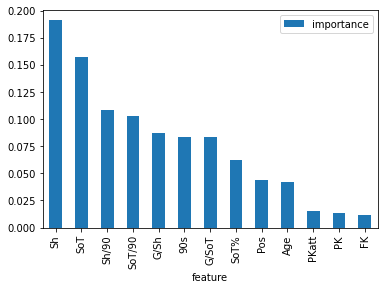

In [56]:
# plot the feature importance
feature_importance.plot.bar(x='feature', y='importance')

In [66]:
data.drop(['Nation','Player','Pos'],axis=1).corr()

,Age,90s,Gls,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,FK,PK,PKatt
Age,1.000000,0.190770,0.161464,0.111636,0.125224,0.042472,-0.238919,-0.150237,0.113967,0.127421,-0.240521,0.266574,0.266574
90s,0.190770,1.000000,0.541854,0.603362,0.593587,0.381410,-0.091146,0.131571,-0.016763,-0.186766,0.367733,0.136301,0.136301
Gls,0.161464,0.541854,1.000000,0.914309,0.952257,0.521924,0.491848,0.723747,0.245388,-0.032597,0.218084,0.514311,0.514311
Sh,0.111636,0.603362,0.914309,1.000000,0.985905,0.441160,0.552231,0.725630,0.035114,-0.176216,0.321478,0.518908,0.518908
SoT,0.125224,0.593587,0.952257,0.985905,1.000000,0.511803,0.532071,0.746020,0.108820,-0.136613,0.264705,0.524646,0.524646
SoT%,0.042472,0.381410,0.521924,0.441160,0.511803,1.000000,0.209634,0.538098,0.586773,0.108647,0.053070,-0.019569,-0.019569
Sh/90,-0.238919,-0.091146,0.491848,0.552231,0.532071,0.209634,1.000000,0.900532,-0.010436,-0.170993,0.074595,0.316764,0.316764
SoT/90,-0.150237,0.131571,0.723747,0.725630,0.746020,0.538098,0.900532,1.000000,0.223940,-0.060956,0.108142,0.381174,0.381174
G/Sh,0.113967,-0.016763,0.245388,0.035114,0.108820,0.586773,-0.010436,0.223940,1.000000,0.866667,-0.085173,-0.201401,-0.201401
G/SoT,0.127421,-0.186766,-0.032597,-0.176216,-0.136613,0.108647,-0.170993,-0.060956,0.866667,1.000000,-0.087067,-0.246785,-0.246785


In [68]:
# make a linear regression model using X and predict y
# import linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,y)
y_pred = model.predict(X)

In [70]:
# print p valies and regression coefficients
import statsmodels.api as sm
X = sm.add_constant(X)
model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    Gls   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     29.62
Date:                Sat, 21 Oct 2023   Prob (F-statistic):           1.28e-06
Time:                        00:00:55   Log-Likelihood:                -30.689
No. Observations:                  24   AIC:                             87.38
Df Residuals:                      11   BIC:                             102.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2757      2.853      0.447      0.6